In [1]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm

from sklearn.metrics import mutual_info_score
import matplotlib.pyplot as plt
from scipy.stats import entropy as et

import pickle

In [2]:
with open('nnde.5neurons.rand1bin.2000evals.v3.backprop.pickle', 'rb') as handle:
    dict_ = pickle.load(handle)

Using Theano backend.
ERROR (theano.gpuarray): Could not initialize pygpu, support disabled
Traceback (most recent call last):
  File "/home/micael/anaconda3/envs/CodeLab/lib/python3.6/site-packages/theano/gpuarray/__init__.py", line 227, in <module>
    use(config.device)
  File "/home/micael/anaconda3/envs/CodeLab/lib/python3.6/site-packages/theano/gpuarray/__init__.py", line 214, in use
    init_dev(device, preallocate=preallocate)
  File "/home/micael/anaconda3/envs/CodeLab/lib/python3.6/site-packages/theano/gpuarray/__init__.py", line 99, in init_dev
    **args)
  File "pygpu/gpuarray.pyx", line 658, in pygpu.gpuarray.init
  File "pygpu/gpuarray.pyx", line 587, in pygpu.gpuarray.pygpu_init
pygpu.gpuarray.GpuArrayException: b'Could not load "libcuda.so": libnvidia-fatbinaryloader.so.384.130: cannot open shared object file: No such file or directory'


In [4]:
dict_['Fold 1']

{'model': <keras.engine.sequential.Sequential at 0x7f8048157a58>,
 'train_desc': <keras.callbacks.History at 0x7f803ba03e10>}

In [47]:
def calc_MI(x, y):
    bins = min( len(np.histogram(x,'fd')[0]), len(np.histogram(y,'fd')[0]))
    '''
    Primeiro precisamos da entropia de x e y para apos o calculo da MI dividir pela raiz do produto das entropias de x e y
    '''
    c_x = np.histogram(x,bins,normed=True)[0]
    c_y = np.histogram(y,bins,normed=True)[0]
    H_x = et(c_x)
    H_y = et(c_y)
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    #mi_normed = np.sqrt(1. - np.exp(-2 * mi))
    #print('H_x: {}, H_y: {}, mi: {}'.format(H_x, H_y, mi))
    if mi == 0:
        return mi
    else:
        return mi/(np.sqrt(H_x*H_y))

def create_mutual_info_matrix(data_set1,data_set2):
    '''
    data_set1 and data_set2 = array[n_samples,features]
    calculate the mutual information between two variables defined in data_set1 and data_set2
    '''
    mutual_info_matrix = np.zeros([data_set1.shape[1],data_set2.shape[1]])

    for irow in range(mutual_info_matrix.shape[1]):
        for jcol in range(mutual_info_matrix.shape[1]):
            mutual_info_matrix[irow,jcol] = calc_MI(data_set1[:, irow],data_set2[:, jcol])
    return mutual_info_matrix

In [2]:
data = np.load('/home/micael/MyWorkspace/RingerRepresentation/2channels/data17-18_13TeV.sgn_lhmedium_probes.EGAM2.bkg.vetolhvloose.EGAM7.samples.npz')
sgn = data['signalPatterns_etBin_2_etaBin_0']
bkg = data['backgroundPatterns_etBin_2_etaBin_0']

In [19]:
np.arange(1, 101)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

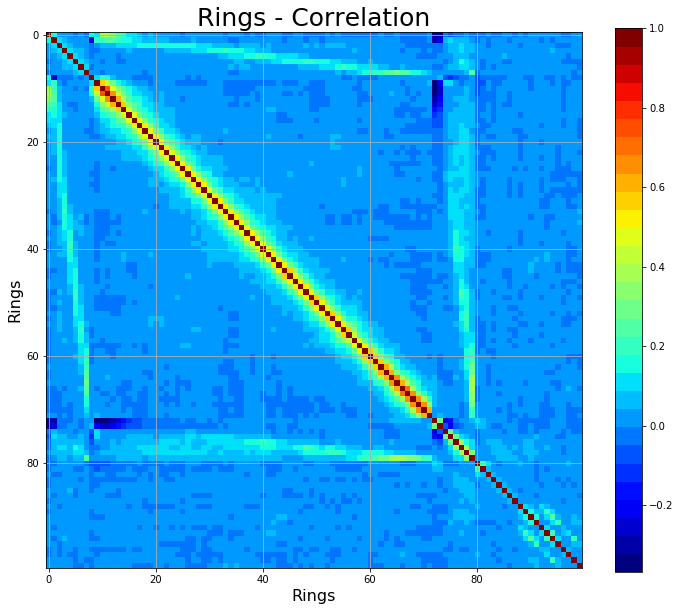

In [56]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(np.corrcoef(sgn, rowvar=False), interpolation="nearest", cmap=cmap)
ax1.grid(True)#, which='minor')#, color='w', linestyle='-', linewidth=10)
plt.title('Rings - Correlation', fontsize=25)
#ax1.set_xticks(np.arange(1, 101))
ax1.set_xlabel('Rings',fontsize=16)
ax1.set_ylabel('Rings',fontsize=16)
#ax1.set_yticklabels(np.arange(1,101),fontsize=10)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax)
plt.savefig('RingsCorrelation.pdf')
plt.show()

In [48]:
mutual_info = create_mutual_info_matrix(sgn, sgn)

In [49]:
np.min(mutual_info)

0.0

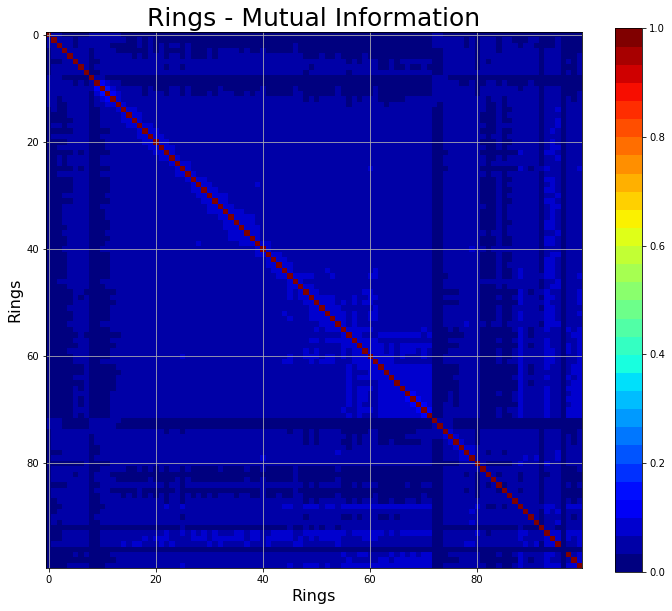

In [55]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(mutual_info, interpolation="nearest", cmap=cmap)
ax1.grid(True)#, which='minor')#, color='w', linestyle='-', linewidth=10)
plt.title('Rings - Mutual Information', fontsize=25)
#ax1.set_xticks(np.arange(1, 101))
ax1.set_xlabel('Rings',fontsize=16)
ax1.set_ylabel('Rings',fontsize=16)
#ax1.set_yticklabels(np.arange(1,101),fontsize=10)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax)
plt.savefig('RingsMutualInfo.pdf')
plt.show()

In [ ]:
def SP_index(PD, FA):
    return np.sqrt(np.sqrt(PD*(1-FA))*(0.5*(PD+(1-FA))))

In [ ]:
PD = np.linspace(0., 1, 30)
FA = 1-PD

In [ ]:

PD, FA = np.meshgrid(PD, FA)
SP = SP_index(PD, FA)

In [ ]:
fig = plt.figure(figsize=(15,13))
ax = plt.axes(projection='3d')
ax.plot_surface(PD, FA, SP,rstride=1, cstride=1, cmap='viridis', edgecolor='black')
ax.set_title('SP Index - Exemple', fontsize=20)
ax.set_xlabel('Detection Probability (PD)', fontsize=15)
ax.set_ylabel('False Alarm (FA)', fontsize=15)
ax.set_zlabel('SP Index (SP)', fontsize=15)
ax.view_init(15, 75)
plt.savefig('SP_plot_example.png', dpi=150)
plt.savefig('SP_plot_example.pdf')
plt.show()